# How to use StrapvizPy

This notebook shows how you can utilize the strapvizpy package within a project. We will be using the toy dataset `iris` from the seaborn package to demonstrate the usage. This dataset contains different iris flowers and their characteristics. 

In [17]:
import strapvizpy

print(strapvizpy.__version__)

0.2.1


In [18]:
# import seaborn to load example data set
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<br>

## 1. Bootstrap

There are two functions  in the bootstrap module, `bootstrap_distribution` and `calculate_boot_stats`. These two functions perform the bootstrapping and calculate the relevant statistics. 

In [19]:
from strapvizpy.bootstrap import bootstrap_distribution, calculate_boot_stats

# Select a single column from data to work with
ex_data = iris["sepal_width"]

<br>

### 1.1 `bootstrap_distribution`     
This function performs the bootstrap and returns an array of the results.    

<br>
<b>Function Inputs</b>

- <u>sample</u> : the data that will be bootstrapped    
- <u>rep</u> : the number of repetitions of bootstrapping    
    - this controls the size of the output array    
- <u>n</u> : number of samples in each bootstrap    
    - default is `auto` which means the distribution will be the same size as the original sample    
- <u>estimator</u> : what sample statistic we are calculating with the bootstrap      
    - mean, median, var (i.e. variance), or sd  (i.e. standard deviation)    
- <u>random_seed</u> : we can set this for reproducibility  
<br>

In [20]:
# returns 50 sample means via bootstrapping
bootstrap_distribution(ex_data, 50, random_seed=20)

array([3.07466667, 3.06533333, 3.044     , 3.04866667, 3.07466667,
       3.13266667, 3.062     , 3.08466667, 3.042     , 3.07333333,
       3.034     , 3.05933333, 3.054     , 3.12466667, 3.07      ,
       3.06133333, 3.102     , 3.04466667, 3.126     , 3.036     ,
       3.03933333, 3.06666667, 3.09466667, 3.07333333, 3.044     ,
       3.06466667, 3.096     , 3.03266667, 3.10266667, 3.078     ,
       3.1       , 3.04066667, 3.09866667, 3.046     , 3.09866667,
       3.08666667, 3.06066667, 3.03      , 3.07133333, 3.15333333,
       2.992     , 3.09266667, 3.03133333, 2.99666667, 3.04066667,
       3.056     , 3.00733333, 3.13666667, 3.12866667, 3.088     ])

<br>

In [21]:
# returns 75 sample variance via bootstrapping 
bootstrap_distribution(ex_data, 75, estimator="var", random_seed=20)

array([0.18535822, 0.19506489, 0.16939733, 0.18449822, 0.17415822,
       0.21633289, 0.205156  , 0.20529822, 0.20416933, 0.17728889,
       0.17771067, 0.15054622, 0.21435067, 0.19905822, 0.16276667,
       0.20583822, 0.19952933, 0.17273822, 0.20445733, 0.19337067,
       0.20251956, 0.16008889, 0.19503822, 0.21795556, 0.18179733,
       0.18468489, 0.18091733, 0.19379956, 0.16785956, 0.17344933,
       0.20373333, 0.18107956, 0.15573156, 0.14915067, 0.21959822,
       0.20155556, 0.22758622, 0.18743333, 0.18191156, 0.20728889,
       0.14540267, 0.18921289, 0.15881822, 0.16472222, 0.20494622,
       0.19459733, 0.17761289, 0.20365556, 0.19684489, 0.161056  ,
       0.17415289, 0.19053333, 0.20593956, 0.16809822, 0.23328889,
       0.19525156, 0.17689067, 0.17509156, 0.16032222, 0.19157156,
       0.16348267, 0.19065289, 0.22592222, 0.17166267, 0.182884  ,
       0.15885733, 0.17381156, 0.22510933, 0.19329822, 0.15343333,
       0.21625289, 0.16119289, 0.17781733, 0.19305067, 0.19366

<br>

### 1.2 `calculate_bootstrap_stats`     
This function performs bootstrapping and returns a dictionary of the sampling distribution statistics.   
<br>
<b>Inputs</b>  

- <u>sample</u> : the data that will be bootstrapped  
- <u>rep</u> : the number of repetitions of bootstrapping    
    - this controls the size of the output array       
- <u>n</u> : number of samples in each bootstrap  
    - default is `auto` which means the distribution will be the same size as the original sample  
- <u>level</u> : the significance level of interest for the sampling distribution 
    - a value between 0 and 1
- <u>estimator</u> : what sample statistic we are calculating with the bootstrap  
    - mean, median, var (i.e. variance), or sd  (i.e. standard deviation)  
- <u>random_seed</u> : we can set this for reproducibility     
- <u> pass_dist </u> : specifies if the sampling distribution is returned from the function 
<br>

In [22]:
# Get 100 sample means via bootstrapping and calcualte statistics at the
# 95% confidence interval
st = calculate_boot_stats(ex_data, 100, level=0.95, random_seed=20)
st

{'lower': 3.003133333333333,
 'upper': 3.1347666666666667,
 'sample_mean': 3.0573333333333337,
 'std_err': 0.03242293495523054,
 'level': 0.95,
 'sample_size': 150,
 'n': 'auto',
 'rep': 100,
 'estimator': 'mean'}

In [23]:
# Output data type
type(st)

dict

In [24]:
# Get 50 sample variances via bootstrapping at a 90% confidence level
# and return the bootstrap distribution along with the statistics

st = calculate_boot_stats(
    ex_data, 50, level=0.90, random_seed=20, estimator="var", pass_dist=True)
st

({'lower': 0.1528796222222222,
  'upper': 0.21722535555555553,
  'sample_var': 0.1887128888888889,
  'std_err': 0.01984580483579152,
  'level': 0.9,
  'sample_size': 150,
  'n': 'auto',
  'rep': 50,
  'estimator': 'var'},
 array([0.18535822, 0.19506489, 0.16939733, 0.18449822, 0.17415822,
        0.21633289, 0.205156  , 0.20529822, 0.20416933, 0.17728889,
        0.17771067, 0.15054622, 0.21435067, 0.19905822, 0.16276667,
        0.20583822, 0.19952933, 0.17273822, 0.20445733, 0.19337067,
        0.20251956, 0.16008889, 0.19503822, 0.21795556, 0.18179733,
        0.18468489, 0.18091733, 0.19379956, 0.16785956, 0.17344933,
        0.20373333, 0.18107956, 0.15573156, 0.14915067, 0.21959822,
        0.20155556, 0.22758622, 0.18743333, 0.18191156, 0.20728889,
        0.14540267, 0.18921289, 0.15881822, 0.16472222, 0.20494622,
        0.19459733, 0.17761289, 0.20365556, 0.19684489, 0.161056  ]))

In [25]:
# Data type when the distribution is returned along with the statistics
type(st)

tuple

In [26]:
type(st[0])

dict

In [27]:
type(st[1])

numpy.ndarray

<br>

## 2. Display
    
There are two functions in the display module, `plot_ci` and `tabulate_stats`. These use the bootstrapping statistics to create report-ready visualizations and tables of the sampling distribution. 

In [28]:
from strapvizpy.display import plot_ci, tabulate_stats

### 2.1 `plot_ci`     
This function creates a histogram of a sampling distribution with its confidence interval and sample mean 

<br>
<b>Inputs:</b>  

- <u>sample</u> : the data that will be bootstrapped
- <u>rep</u> : the number of repetitions of bootstrapping 
- <u>bin_size</u> : the number of bins data will be split into for the histogram 
- <u>estimator</u>: the sampling distribution estimator
    - mean, median, var (i.e. variance), or sd (i.e. standard deviation)
- <u>n</u> :  number of samples in each bootstrap 
    - default is `auto` which means the distribution will be the same size as the original sample  
- <u>level</u> : the significance level of interest for the sampling distribution
    - value between 0 and 1
- <u>random_seed</u> : we can set this for reproducibility 
- <u>title</u> : title of the histogram
- <u> y_axis</u> : name of the y axis
- <u> path</u>: path to where function should be saved
    - default is None which means the plot will not be saved
<br>

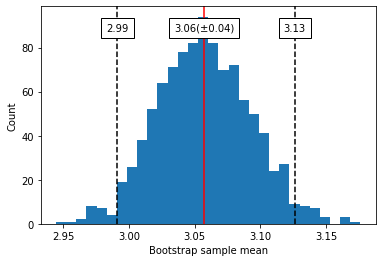

In [29]:
# Plot sampling distibution of 1000 sample means at a 95% confidence interval
plot_ci(ex_data, rep=1000, level=0.95, random_seed=123);

<br>

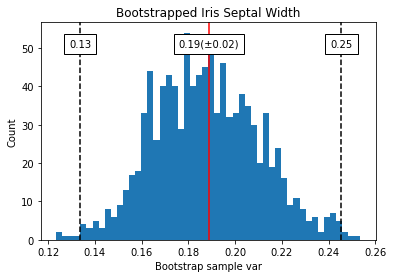

In [30]:
# Plot sampling distibution of 1000 sample means at a 99% confidence interval
# with a unique title and a bin size of 50

title = "Bootstrapped Iris Septal Width"
plot_ci(
    ex_data, rep=1000, bin_size=50, level=0.99,
    title=title, random_seed=123, estimator = "var");

<br>

### 2.2 `tabulate_stats`     
This function creates two tables that summarize the sampling distribution and the parameters for creating the bootstrapped samples and saves them as latex files.

<br>
<b>Inputs</b>  

- <u>stat</u> : summary statistics produced by the `calculate_boot_stats()` function 
- <u>precision</u> : the precision of the table values
    - how many decimal places are shown 
- <u>estimator</u> : indicates if the bootstrapped statistic is shown in the summary statistics table
- <u>alpha</u> : indicates if the significance level should be shown in the summary statistics table
- <u>path</u> : can specify a folder path where you want to save the tables


In [31]:
st = calculate_boot_stats(ex_data, 1000, level=0.95, random_seed=20)

stats_table, parameter_table = tabulate_stats(st)

In [32]:
stats_table

Lower Bound CI,Upper Bound CI,Standard Error,Sample mean,Significance Level
2.99,3.12,0.03,3.06,0.050


<br>

In [33]:
parameter_table

Sample Size,Repetition,Significance Level
150,1000,0.050


<br>

In [34]:
# tables are pandas styler objects not pandas dataframes
type(stats_table)

pandas.io.formats.style.Styler

In [35]:
# Changes the styler object back to a pandas dataframe
stats_table.data

,Lower Bound CI,Upper Bound CI,Standard Error,Sample mean,Significance Level
0,2.9933,3.124667,0.033979,3.057333,0.05


In [36]:
type(stats_table.data)

pandas.core.frame.DataFrame